# Create RiverFlood Hazard object from netCDF file

In [90]:
from climada_petals.hazard.river_flood import RiverFlood
from climada.hazard.centroids import Centroids

In [91]:
# generating RiverFlood hazard from netCDF file
dph_choice = ['../Climada_Data/flddph_150arcsec_clm50_gfdl-esm2m_0_hist.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc']
# ../Climada_Data/flddph_150arcsec_clm50_gfdl-esm2m_0_hist.nc -> past climate
# ../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc -> climate scenario rcp26
# ../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc -> climate scenario rcp60
# ../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc -> climate scenario rcp85
frc_choice = ['../Climada_Data/fldfrc_150arcsec_clm50_gfdl-esm2m_0_hist.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc']
# ../Climada_Data/fldfrc_150arcsec_clm50_gfdl-esm2m_0_hist.nc -> past climate
# ../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc -> climate scenario rcp26
# ../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc -> climate scenario rcp60
# ../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc -> climate scenario rcp85
rf = RiverFlood.from_nc(countries = ['DEU'], years=range(1990,2001), dph_path=dph_choice[0], frc_path=frc_choice[0])
rf.event_name 

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000']

<GeoAxes: title={'center': 'RF max intensity at each point'}>

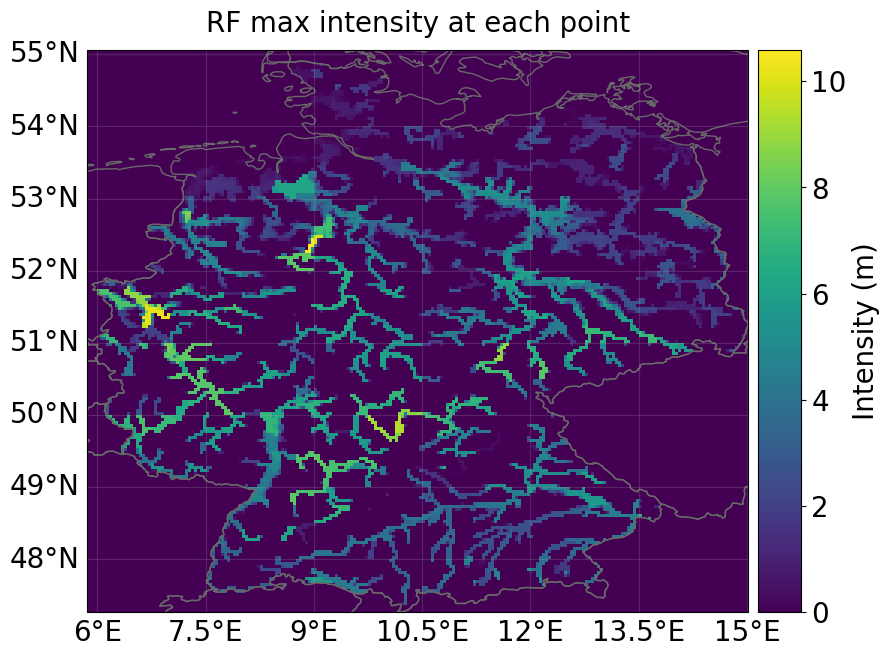

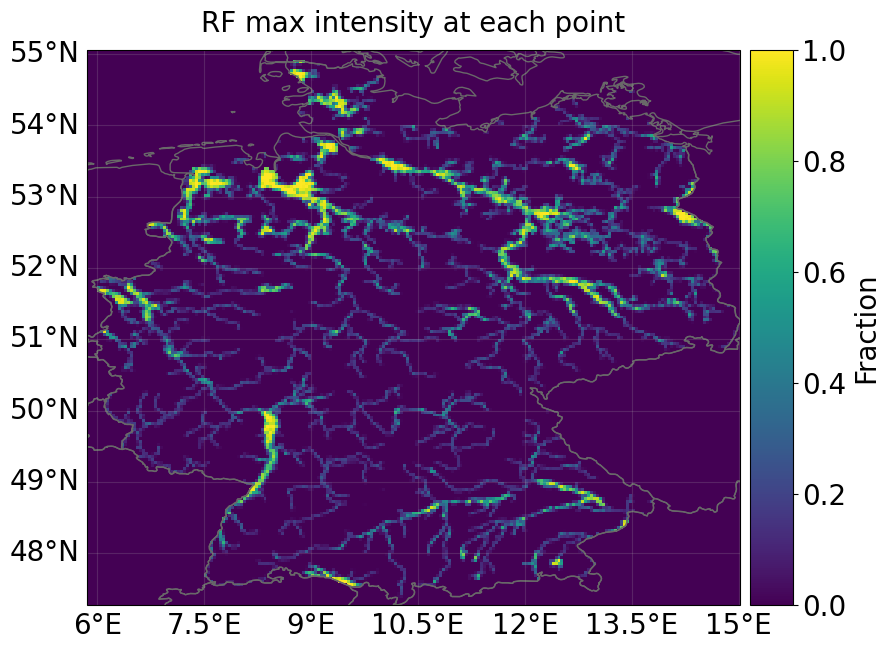

In [92]:
# plotting intensity (Flood depth in m)
rf.plot_intensity(event=0, smooth = False)
# plotting fraction flooded
rf.plot_fraction(event=0, smooth = False)

# Calculating Flooded Area

In [93]:
# calculating flooded area
rf.set_flooded_area()

print("Total flooded area for year " + str(2100) + " in Germany:")
print(str(rf.fla_annual[0]) + " m2")

/Users/arnaudgoussebaile/miniconda3/envs/climada_env/lib/python3.9/site-packages/climada/hazard/centroids/centr.py:873: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xy_pixels = self.geometry.buffer(res / 2).envelope


Total flooded area for year 2100 in Germany:
25056930673.863014 m2


# Setting JRC damage functions

<Axes: title={'center': 'RF 3: Flood Europe JRC Residential noPAA'}, xlabel='Intensity (m)', ylabel='Impact (%)'>

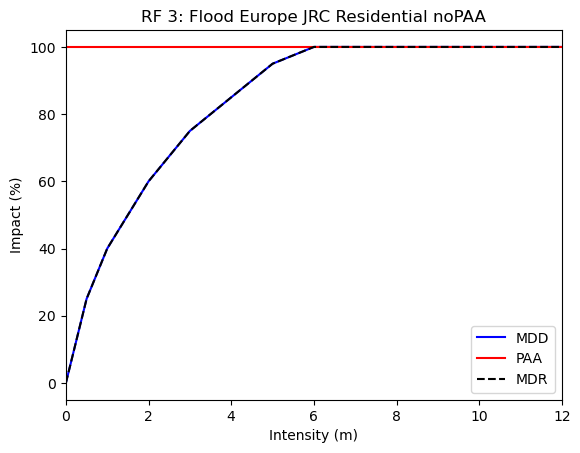

In [94]:
from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood,flood_imp_func_set
impf_set = flood_imp_func_set()
impf_EUR = impf_set.get_func(fun_id=3)
impf_EUR[0].plot()

# Deriving flood impact with LitPop exposure

In [95]:
from climada.entity import LitPop
lp_exp = LitPop.from_countries(['DEU'], fin_mode='pc')
lp_exp.gdf

2024-03-20 18:03:35,770 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-20 18:03:35,802 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-20 18:03:35,834 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-20 18:03:35,863 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-20 18:03:35,888 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-20 18:03:35,920 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-20 18:03:35,957 - climada.entity.exposures.litpop.gpw_populati

,value,latitude,longitude,geometry,region_id,impf_
0,83467.747667,53.612500,6.720833,POINT (6.72083 53.61250),276,1
1,129737.476899,53.612500,6.729167,POINT (6.72917 53.61250),276,1
2,175011.915357,53.612500,6.737500,POINT (6.73750 53.61250),276,1
3,213820.096799,53.612500,6.745833,POINT (6.74583 53.61250),276,1
4,227600.866940,53.612500,6.754167,POINT (6.75417 53.61250),276,1
...,...,...,...,...,...,...
661391,250341.475979,54.762500,8.287500,POINT (8.28750 54.76250),276,1
661392,217783.790202,54.762500,8.295833,POINT (8.29583 54.76250),276,1
661393,85829.483882,54.754167,8.279167,POINT (8.27917 54.75417),276,1
661394,249694.815009,54.754167,8.287500,POINT (8.28750 54.75417),276,1


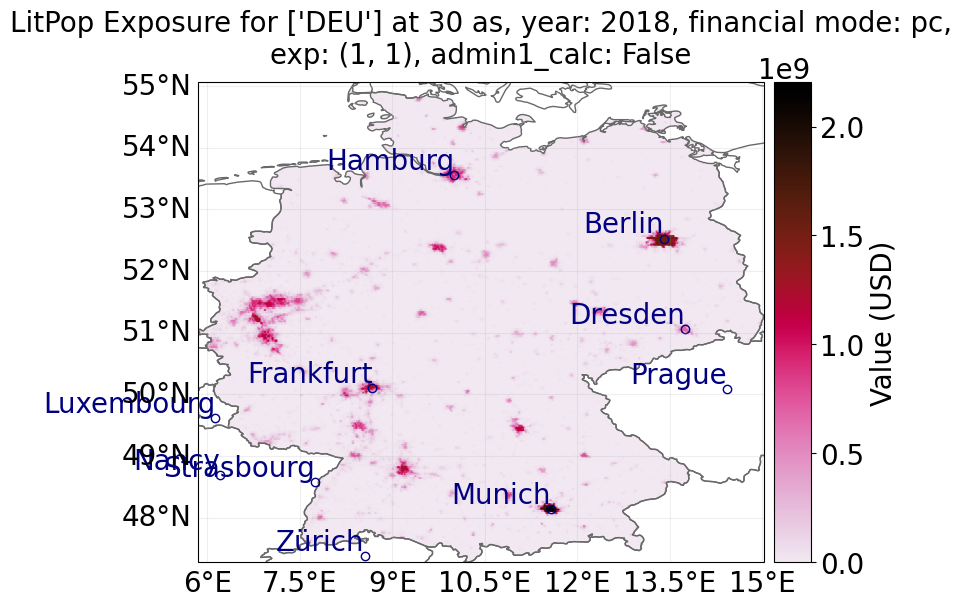

In [96]:
# In the LitPop exposure the damage function for river floods needs
# to be specified manually.
import pandas as pd
from climada_petals.util.constants import RIVER_FLOOD_REGIONS_CSV

info = pd.read_csv(RIVER_FLOOD_REGIONS_CSV)
lp_exp.gdf['impf_RF'] = info.loc[info['ISO']=='DEU','impf_RF'].values[0]
lp_exp
lp_exp.plot_hexbin(pop_name=True);

2024-03-20 18:04:09,100 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.


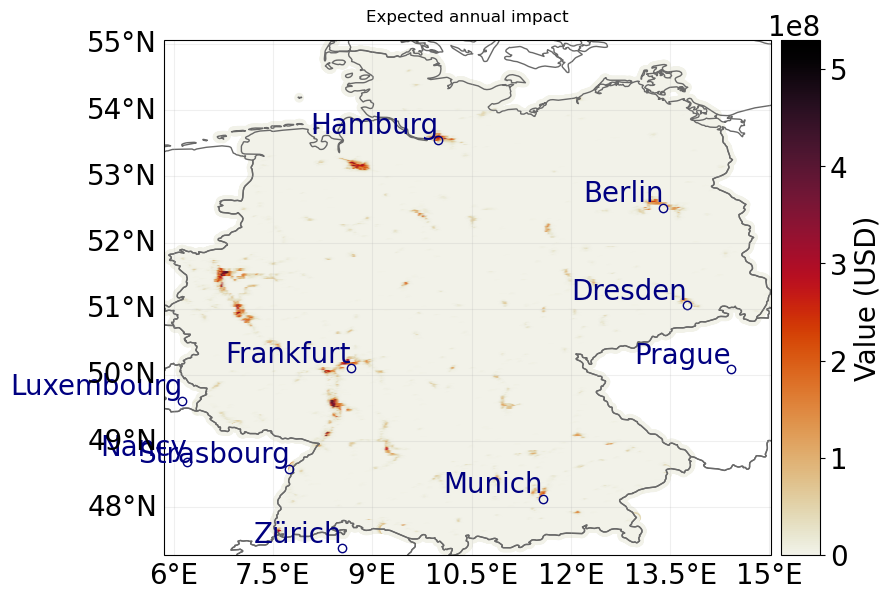

In [97]:
from climada.engine import Impact

imp=Impact()
imp.calc(lp_exp,impf_set,rf,save_mat=True)
imp.plot_scatter_eai_exposure();